### **绘制2D直方图**

In [9]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [10]:
# 计算前需要将图像由BGR格式转换为HSV格式， H通道取值为[0, 180], S通道取值为[0, 255], V通道值全为255
hsv_map = np.zeros((180, 256, 3), np.uint8)
h, s = np.indices(hsv_map.shape[:2])
hsv_map[:, :, 0] = h
hsv_map[:, :, 1] = s
hsv_map[:, :, 2] = 255
hsv_map = cv.cvtColor(hsv_map, cv.COLOR_HSV2BGR)

In [11]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'road.jpg')
if img is None:
    print('Failed to read road.jpg')
    sys.exit

In [12]:
# 将图片从BGR格式转换为HSV格式
image_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# 计算2D直方图
# histSize为[180，256]，其中180代表H通道，256代表S通道，range为[0, 180, 0 ,256]，0~180代表H通道的取值范围，0~256代表S通道的取值范围
image_hist = cv.calcHist([image_hsv], [0, 1], None, [180, 256], [0, 180, 0 ,256])
# 将计算出的直方图矩阵和创建的hsv_map相乘
result = hsv_map * image_hist[:, :, np.newaxis] / 255.0

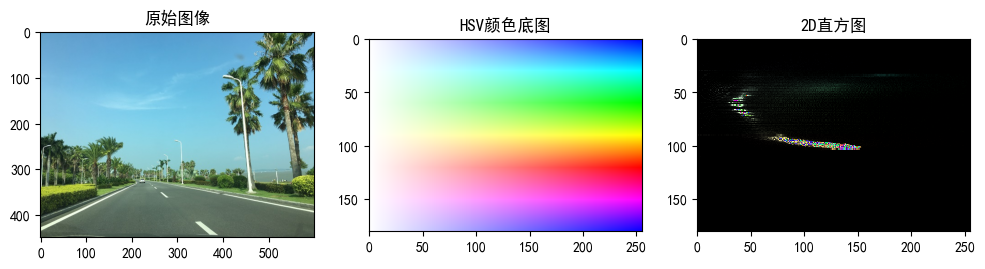

In [ ]:
# 绘制直方图并展示
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('原始图像')
plt.imshow(img[:, :, [2, 1, 0]])
plt.subplot(1, 3, 2)
plt.title('HSV颜色底图')
plt.imshow(hsv_map)
plt.subplot(1, 3, 3)
plt.title('2D直方图')
# 采用最临近插值法
plt.imshow(np.uint8(result), interpolation='nearest')